In [3]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt

import misc

# Open-sky

In [4]:
#folder_path = "/mnt/c/Users/vmangr/OneDrive - TUNI.fi/Shared/GEOLOC/dataset/S1"
folder_path = "/mnt/c/Users/Antoine/OneDrive - TUNI.fi/Shared/GEOLOC/dataset/S1"
acq_list = [f"A{i:d}" for i in range(1, 11)]
device_android = ['A52', 'GP7', 'GPW', 'SW6']
device_uliss = ['UA', 'U1']
files_type = ['RINEX', 'RAW', 'MAT']
survey = 'S1'

In [5]:
# Load Android files
log_android = misc.load_raw(folder_path, acq_list, device_android, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

In [6]:
# Load ULISS RINEX files
log_rinex = misc.load_rinex(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

In [7]:
# Load ULISS Matlab files
log_mat = misc.load_mat(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

## Texting

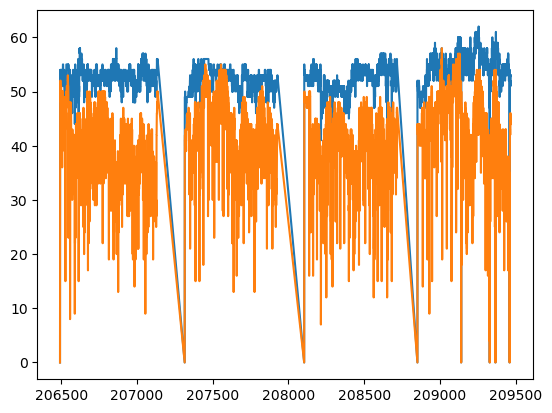

In [36]:
plt.figure()
plt.plot(log_mat['UA']['time'], log_mat['UA']['num_sat'])
plt.plot(log_mat['UA']['time'], log_mat['UA']['num_sat_valid'])

In [ ]:
log_dict = {}
mode = ['TEXTING']

for device, log in log_android.items():
    log_dict[device] = log[log['mode'].isin(mode)]

for device, log in log_android.items():
    log_dict[device] = log[log['mode'].isin(mode)]

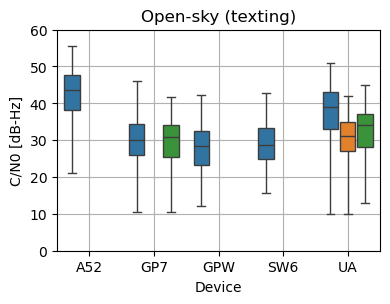

In [18]:
log_dict = {}
log_dict.update(log_android)
log_dict.update(log_rinex)
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Open-sky (texting)")
plt.gca().get_legend().remove()

## Swinging

In [5]:
# Load files
log_dict = misc.load_files(folder_path, acq_list, device_android, device_uliss, mode='SWINGING', survey='S1')

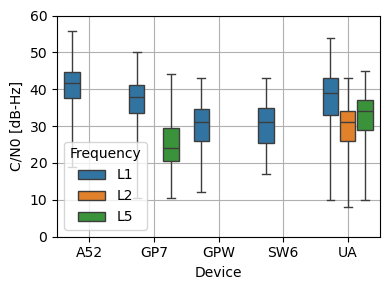

In [6]:
misc.plotBoxPlotCN0(log_dict, device_android, device_uliss)
plt.title("Open-sky (swinging)")
plt.gca().get_legend().remove()

## Pocket

In [7]:
device_uliss = ['U1']
log_dict = misc.load_files(folder_path, acq_list, device_android, device_uliss, mode='POCKET', survey='S1')

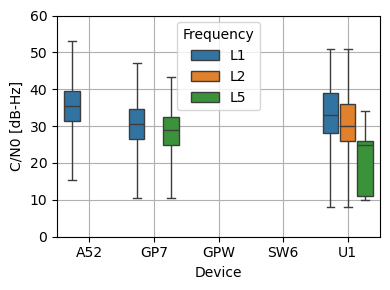

In [8]:
misc.plotBoxPlotCN0(log_dict, device_android, device_uliss)
plt.title("Open-sky (pocket)")
plt.gca().get_legend().remove()

## Comparing modes

In [8]:
log_dict = {}
log_dict.update(log_android)
log_dict.update(log_rinex)

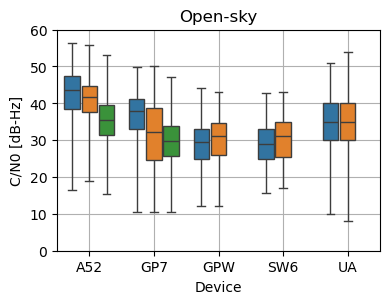

In [9]:
misc.plotBoxPlotCN0PerMode(log_dict, device_android, device_uliss)
plt.title("Open-sky")
plt.gca().get_legend().remove()

,TimeNanos,prn,mode
0,1.105000e+09,G06-L1,SWINGING
1,1.105000e+09,G11-L1,SWINGING
2,1.105000e+09,G12-L1,SWINGING
3,1.105000e+09,G24-L1,SWINGING
4,1.105000e+09,G25-L1,SWINGING
...,...,...,...
316083,6.543370e+11,E08-L5,POCKET
316084,6.543370e+11,E10-L5,POCKET
316085,6.543370e+11,E12-L5,POCKET
316086,6.543370e+11,E24-L5,POCKET


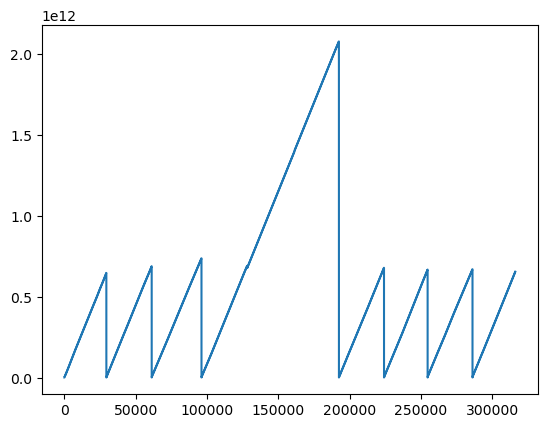

In [28]:
#for device, log in log_dict.items():
#log_dict['GP7']['prn']
log = log_dict['GP7']
df = log[['TimeNanos', 'prn', 'mode']]
plt.plot(df['TimeNanos'])
# df = df.groupby(['TimeNanos', 'mode']).nunique()
df

In [13]:

df = pd.DataFrame()
for device, log in log_dict.items():
    _df = log[['TimeNanos', 'prn', 'mode']]
    _df = _df.groupby(['TimeNanos', 'mode']).nunique()
    if device in device_android:
        _df = log.reset_index()[['TimeNanos', 'prn']]
    # if device in device_uliss:
    #     _df = log[['snr', 'mode']]
    #     _df.rename(columns={'snr':'Cn0DbHz'}, inplace=True)
    #_df['device'] = device

    #df = pd.concat([df, _df], axis=0)
_df


,TimeNanos,prn
0,0.000000e+00,G12-L1
1,0.000000e+00,G11-L1
2,0.000000e+00,G32-L1
3,0.000000e+00,G12-L1
4,0.000000e+00,G11-L1
...,...,...
69998,6.276308e+11,E03-L1
69999,6.276308e+11,E02-L1
70000,6.276308e+11,C19-L1
70001,6.276308e+11,R03-L1


In [109]:
import seaborn as sns
plt.figure(figsize=(4,3))
sns.boxplot(data=df, x='device', y='prn', hue='mode', order = device_android + device_uliss, 
            hue_order=['TEXTING', 'SWINGING', 'POCKET'], whis=(0, 100), gap=.1)
plt.ylim((0, 60))
plt.rc('axes', axisbelow=True)
plt.grid()
plt.tight_layout()
plt.xlabel("Device")
plt.ylabel("C/N0 [dB-Hz]")


ValueError: Could not interpret value `mode` for `hue`. An entry with this name does not appear in `data`.

<Figure size 400x300 with 0 Axes>

# Light indoor (train station)

In [9]:
#folder_path = "/mnt/c/Users/vmangr/OneDrive - TUNI.fi/Shared/GEOLOC/dataset/S1"
folder_path = "/mnt/c/Users/Antoine/OneDrive - TUNI.fi/Shared/GEOLOC/dataset/S3"
acq_list = ['A1', 'A2', 'A3', 'A4']
device_android = ['A52', 'GP7', 'GPW', 'SW6']
device_uliss = ['UA']
acq_list

['A1', 'A2', 'A3', 'A4']

## Texting

In [10]:
log_dict = misc.load_files(folder_path, acq_list, device_android, device_uliss, mode='TEXTING', indoor_only=True, survey='S3')

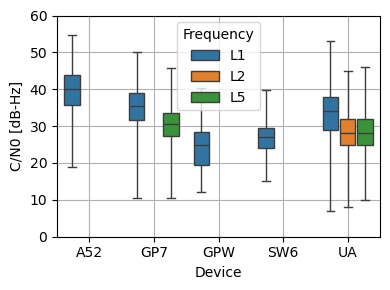

In [11]:
misc.plotBoxPlotCN0(log_dict, device_android, device_uliss)
plt.title("Light indoor (texting)")
plt.gca().get_legend().remove()

## Swinging

In [12]:
log_dict = misc.load_files(folder_path, acq_list, device_android, device_uliss, mode='SWINGING', indoor_only=True, survey='S3')

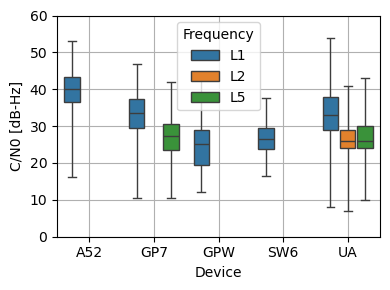

In [13]:
misc.plotBoxPlotCN0(log_dict, device_android, device_uliss)
plt.title("Light indoor (swinging)")
plt.gca().get_legend().remove()

## Pocket

In [14]:
device_uliss = ['U1']
log_dict = misc.load_files(folder_path, acq_list, device_android, device_uliss, mode='SWINGING', indoor_only=True, survey='S3')

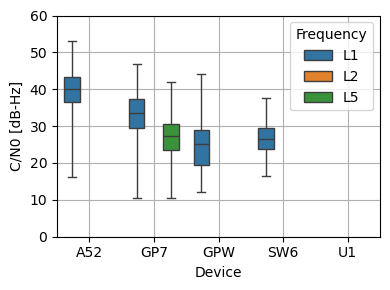

In [15]:
misc.plotBoxPlotCN0(log_dict, device_android, device_uliss)
plt.title("Light indoor (pocket)")
plt.gca().get_legend().remove()

# Urban canyioning 

In [16]:
#folder_path = "/mnt/c/Users/vmangr/OneDrive - TUNI.fi/Shared/GEOLOC/dataset/S1"
folder_path = "/mnt/c/Users/Antoine/OneDrive - TUNI.fi/Shared/GEOLOC/dataset/S4"
acq_list = ['A1', 'A2']
device_android = ['A52', 'GP7', 'GPW', 'SW6']
device_uliss = ['UA']

In [17]:
log_dict = misc.load_files(folder_path, acq_list, device_android, device_uliss, mode='TEXTING', survey='S4')

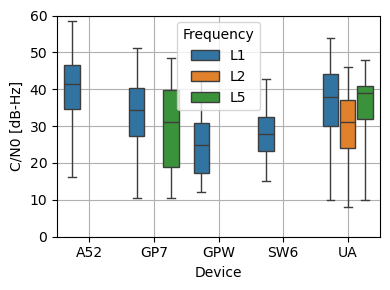

In [18]:
misc.plotBoxPlotCN0(log_dict, device_android, device_uliss)
plt.title("Urban canyoning (texting)")
plt.gca().get_legend().remove()

## Swinging
NOT APPLICABLE 

## Pocket

In [19]:
device_uliss = ['U1']
log_dict = misc.load_files(folder_path, acq_list, device_android, device_uliss, mode='POCKET', survey='S4')

In [ ]:
misc.plotBoxPlotCN0(log_dict, device_android, device_uliss)
plt.title("Urban canyoning (pocket)")
plt.gca().get_legend().remove()